### Dataset
*Last updated: 18 Nov 2019*

Loading and formatting the CIFAR-10 Dataset.

Saves 2 csv files and corresponding numpy files. The csv files contain the index - label pairs for the corresponding numpy file that contains the image data.

* train.csv -- train.npy
* test.csv -- test.npy

**location: CIFAR10_Data/**

In [1]:
from modules import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read all 5 training batches and concatenate the data - save to files

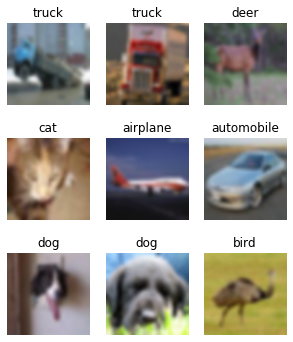

In [2]:
# create and save the training data
train_data = np.empty((0, 32, 32, 3), dtype=np.uint8)
train_df = pd.DataFrame(columns=['label', 'label_name', 'batch'])

for i in range(1, 6):
    X, Y = utils.load_batch('CIFAR10_Data/data_batch_{}'.format(i))
    Y['batch'] = [i] * len(Y)  # add batch column for batch training
    
    # concatenate the image data and label data
    train_data = np.concatenate((train_data, X))
    train_df = train_df.append(Y, ignore_index=True)
    
    
utils.plot_samples(train_data, train_df)
# save the dataframe to csv and the image data to numpy
train_df.to_csv('CIFAR10_Data/train.csv', index=False)
np.save('CIFAR10_Data/train', train_data)

Save the testing image data and corresponding csv file

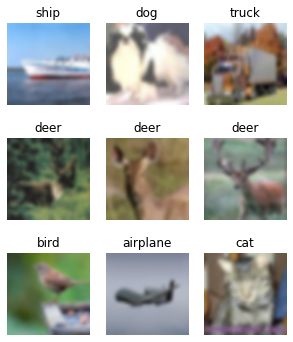

In [3]:
test_data, test_df = utils.load_batch('CIFAR10_Data/test_batch')
test_df['batch'] = [1] * len(test_df)  # add batch column for batch training
utils.plot_samples(test_data, test_df)

# save the dataframe to csv and the image data to numpy
test_df.to_csv('CIFAR10_Data/test.csv', index=False)
np.save('CIFAR10_Data/test', test_data)